# Dog breed identification


## I. Initial exploration

In [1]:
import os
PATH = 'data/'
os.listdir(PATH)

['data_zip', 'labels.csv', 'sample_submission.csv', 'test', 'train']

### Submission file

In [2]:
import pandas as pd
df_sample_submission=pd.read_csv(PATH + 'sample_submission.csv')
df_sample_submission.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
4,001a5f3114548acdefa3d4da05474c2e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333


### Label table

In [3]:
dflabels=pd.read_csv(PATH + 'labels.csv')
dflabels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


,id
breed,
scottish_deerhound,126
maltese_dog,117
afghan_hound,116
entlebucher,115
bernese_mountain_dog,114


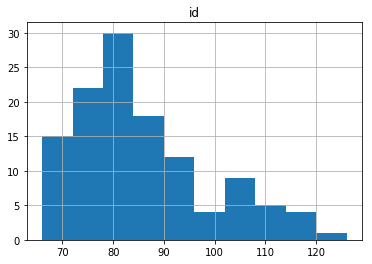

In [64]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

pivot_label=dflabels.pivot_table(index=['breed'],columns=[],aggfunc=len).sort_values(by='id',ascending=False)
pivot_label.hist(bins=10)
pivot_label.head()

### Test/Train set

In [19]:
print('Test')
print(os.listdir(f'{PATH}test/')[:5])

print('\n----------------\n\nTrain')
print(os.listdir(f'{PATH}train/')[:5])


Test
['000621fb3cbb32d8935728e48679680e.jpg', '00102ee9d8eb90812350685311fe5890.jpg', '0012a730dfa437f5f3613fb75efcd4ce.jpg', '001510bc8570bbeee98c8d80c8a95ec1.jpg', '001a5f3114548acdefa3d4da05474c2e.jpg']

----------------

Train
['000bec180eb18c7604dcecc8fe0dba07.jpg', '001513dfcb2ffafc82cccf4d8bbaba97.jpg', '001cdf01b096e06d78e9e5112d419397.jpg', '00214f311d5d2247d5dfe4fe24b2303d.jpg', '0021f9ceb3235effd7fcde7f7538ed62.jpg']


In [61]:
def plots(ims,figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

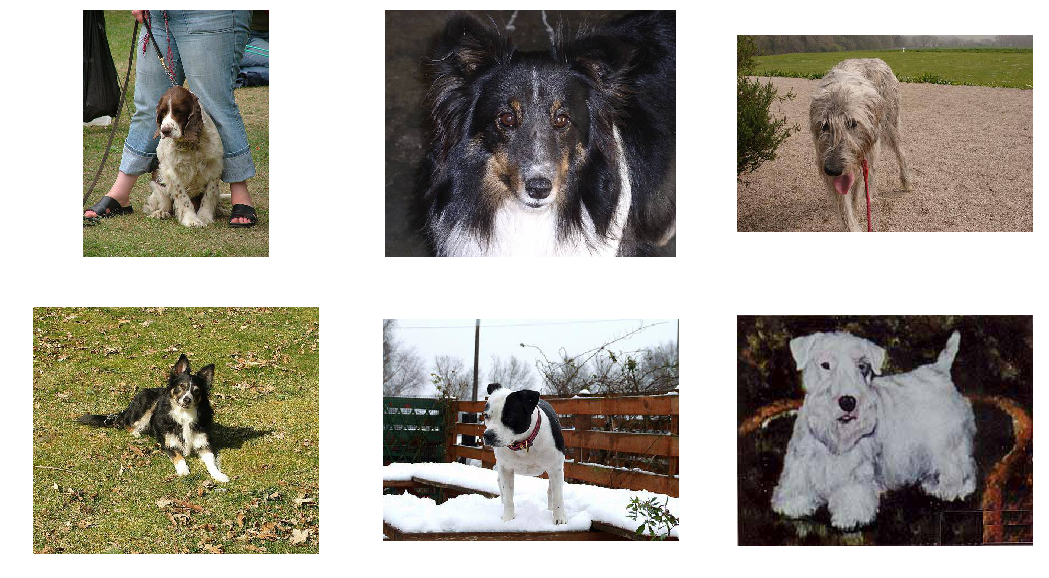

In [62]:
list_img_train=[f'{PATH}train/' + _ for _ in os.listdir(PATH +'train')]
idx=np.random.permutation(len(list_img_train))
img=[plt.imread(list_img_train[idx[i]]) for i in range(6)]
plots(img,figsize=(18,10),rows=2)

## II. Model